In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Lambda, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


170498071/170498071 [==============================] - 6s 0us/step


# CNN

In [ ]:


# Add Gaussian noise to the input data
mu, sigma = 0, 0.1
noise = np.random.normal(mu, sigma, (32,32,3))
x_train_noisy = np.clip(x_train + noise, 0, 1)
x_test_noisy = np.clip(x_test + noise, 0, 1)

# Define the encoder architecture
input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
encoder = Model(input_img, encoded)

# Define the decoder architecture
input_encoded = Input(shape=(8, 8, 64))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
decoder = Model(input_encoded, decoded)

# Build the autoencoder model
autoencoder_input = Input(shape=(32, 32, 3))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = Model(autoencoder_input, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
391/391 [==============================] - 14s 14ms/step - loss: 0.0112 - val_loss: 0.0060
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 0.0056 - val_loss: 0.0051
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 7/10
391/391 [==============================] - 5s 12ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 8/10
391/391 [==============================] - 6s 16ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 9/10
391/391 [==============================] - 5s 12ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 10/10
391/391 [==============================] - 5s 12ms/step - loss: 0.0032 - val_l

313/313 [==============================] - 1s 3ms/step


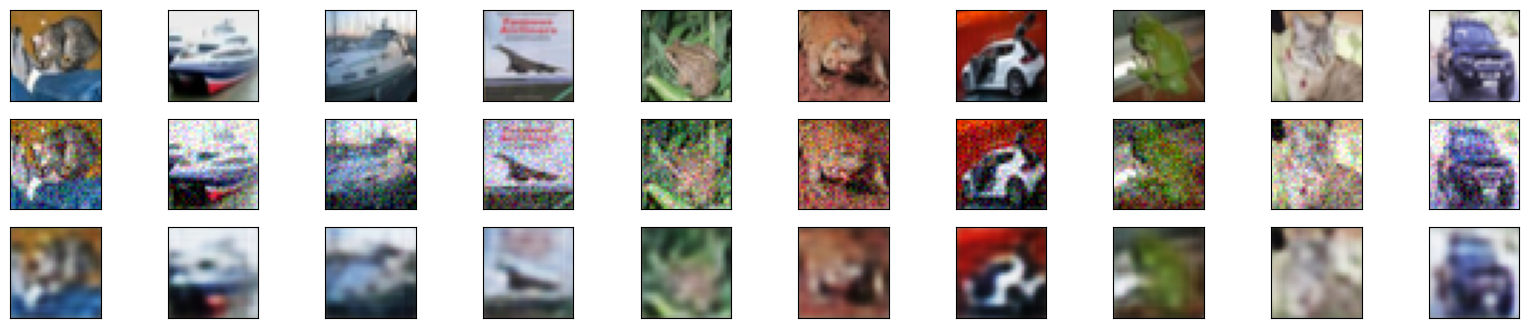

In [ ]:
# Use the trained autoencoder to denoise images
denoised_imgs = autoencoder.predict(x_test_noisy)

# Plot original, noisy, and denoised images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# ***CNN+Noise***

noise_factor = 0.5


Epoch 1/15
196/196 [==============================] - 8s 23ms/step - loss: 0.0212 - val_loss: 0.0143
Epoch 2/15
196/196 [==============================] - 4s 19ms/step - loss: 0.0135 - val_loss: 0.0129
Epoch 3/15
196/196 [==============================] - 4s 21ms/step - loss: 0.0127 - val_loss: 0.0124
Epoch 4/15
196/196 [==============================] - 4s 20ms/step - loss: 0.0122 - val_loss: 0.0119
Epoch 5/15
196/196 [==============================] - 4s 19ms/step - loss: 0.0119 - val_loss: 0.0117
Epoch 6/15
196/196 [==============================] - 4s 21ms/step - loss: 0.0116 - val_loss: 0.0117
Epoch 7/15
196/196 [==============================] - 4s 20ms/step - loss: 0.0115 - val_loss: 0.0113
Epoch 8/15
196/196 [==============================] - 4s 19ms/step - loss: 0.0113 - val_loss: 0.0114
Epoch 9/15
196/196 [==============================] - 4s 21ms/step - loss: 0.0112 - val_loss: 0.0111
Epoch 10/15
196/196 [==============================] - 4s 20ms/step - loss: 0.0111 - val_lo

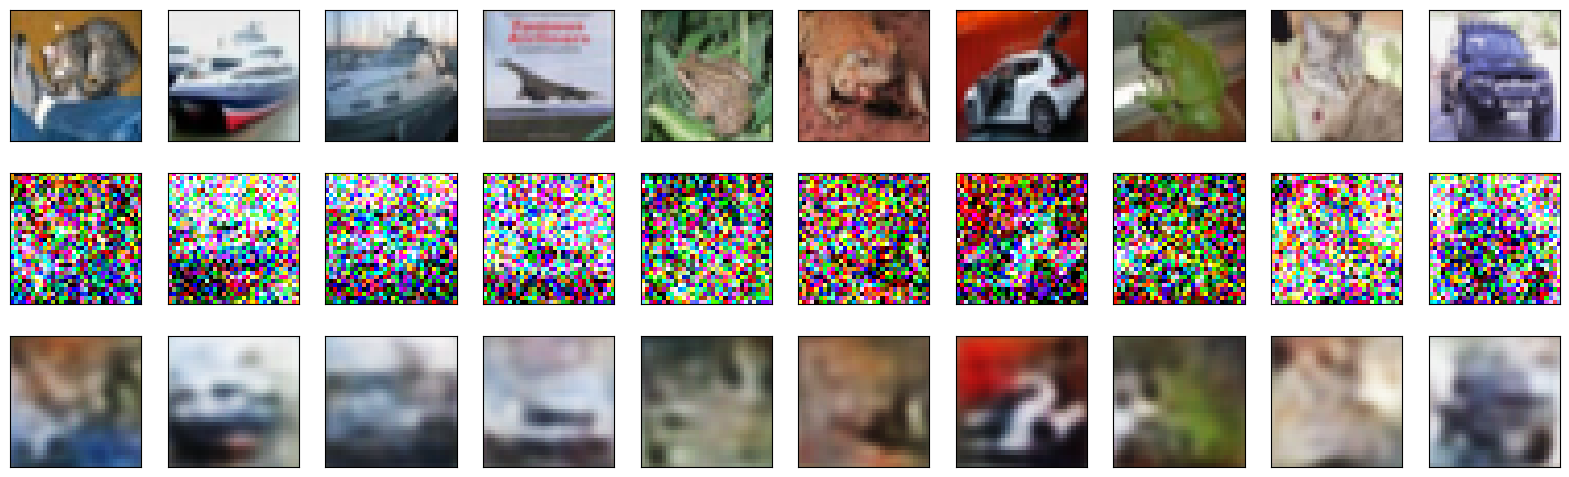

In [ ]:


# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be in the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the autoencoder architecture for image denoising
input_img = Input(shape=(32, 32, 3))  # Input shape for CIFAR-10 images

# Encoder
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)

# Decoder
decoded = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the denoising autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=15,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Denoise the test set
denoised_imgs = autoencoder.predict(x_test_noisy)

# Display original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


noise_factor = 0.1

Epoch 1/10
196/196 [==============================] - 6s 24ms/step - loss: 0.0147 - val_loss: 0.0080
Epoch 2/10
196/196 [==============================] - 4s 22ms/step - loss: 0.0070 - val_loss: 0.0059
Epoch 3/10
196/196 [==============================] - 4s 20ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 4/10
196/196 [==============================] - 4s 20ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 5/10
196/196 [==============================] - 4s 20ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 6/10
196/196 [==============================] - 4s 21ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 7/10
196/196 [==============================] - 4s 20ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 8/10
196/196 [==============================] - 4s 20ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 9/10
196/196 [==============================] - 5s 24ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


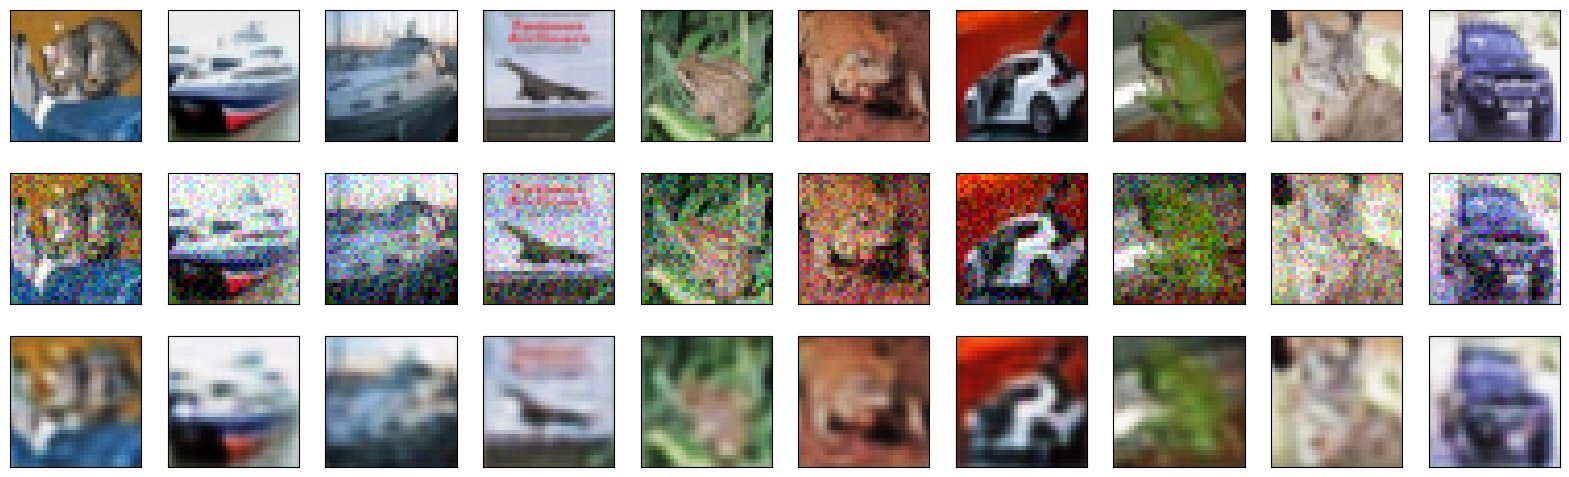

In [ ]:


# Add Gaussian noise to the images
mu, sigma = 0, 0.1  # Mean and standard deviation
noise = np.random.normal(mu, sigma, (32,32,3))
x_train_noisy = x_train + noise
x_test_noisy = x_test + noise

# Clip the values to be in the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the autoencoder architecture for image denoising
input_img = Input(shape=(32, 32, 3))  # Input shape for CIFAR-10 images

# Encoder
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)

# Decoder
decoded = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the denoising autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Denoise the test set
denoised_imgs = autoencoder.predict(x_test_noisy)

# Display original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# CNN + noise in Latent space

Epoch 1/10
196/196 [==============================] - 6s 24ms/step - loss: 0.0169 - val_loss: 0.0188
Epoch 2/10
196/196 [==============================] - 4s 20ms/step - loss: 0.0081 - val_loss: 0.0163
Epoch 3/10
196/196 [==============================] - 4s 21ms/step - loss: 0.0066 - val_loss: 0.0151
Epoch 4/10
196/196 [==============================] - 4s 20ms/step - loss: 0.0060 - val_loss: 0.0153
Epoch 5/10
196/196 [==============================] - 4s 19ms/step - loss: 0.0055 - val_loss: 0.0139
Epoch 6/10
196/196 [==============================] - 4s 22ms/step - loss: 0.0051 - val_loss: 0.0146
Epoch 7/10
196/196 [==============================] - 4s 20ms/step - loss: 0.0048 - val_loss: 0.0176
Epoch 8/10
196/196 [==============================] - 4s 20ms/step - loss: 0.0047 - val_loss: 0.0137
Epoch 9/10
196/196 [==============================] - 4s 23ms/step - loss: 0.0044 - val_loss: 0.0129
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


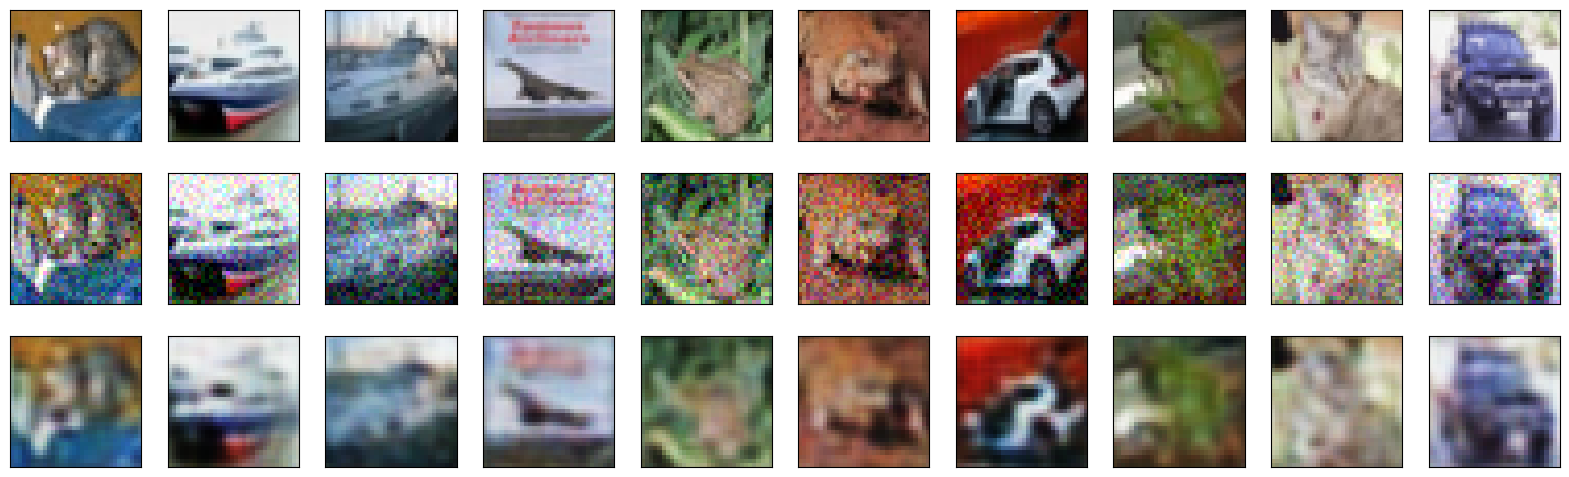

In [ ]:
# Add Gaussian noise to the images
mu, sigma = 0, 0.1  # Mean and standard deviation
noise = np.random.normal(mu, sigma, x_test.shape)
x_test_noisy = x_test + noise
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the autoencoder architecture
input_img = Input(shape=(32, 32, 3))  # Input shape for CIFAR-10 images

# Encoder
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)

# Add Gaussian noise to the encoded representation
def add_noise(x):
    mu, sigma = 0, 0.1
    noise = K.random_normal(shape=K.shape(x), mean=mu, stddev=sigma)
    return x + noise

encoded_noisy = Lambda(add_noise)(encoded)

# Decoder
decoded = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded_noisy)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Create a separate model for the encoder
encoder_model = Model(input_img, encoded_noisy)

# Train the denoising autoencoder
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))  # Train on noisy images

# Denoise the test set
denoised_imgs = autoencoder.predict(x_test_noisy)

# Display original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display encoded noisy images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# PCA

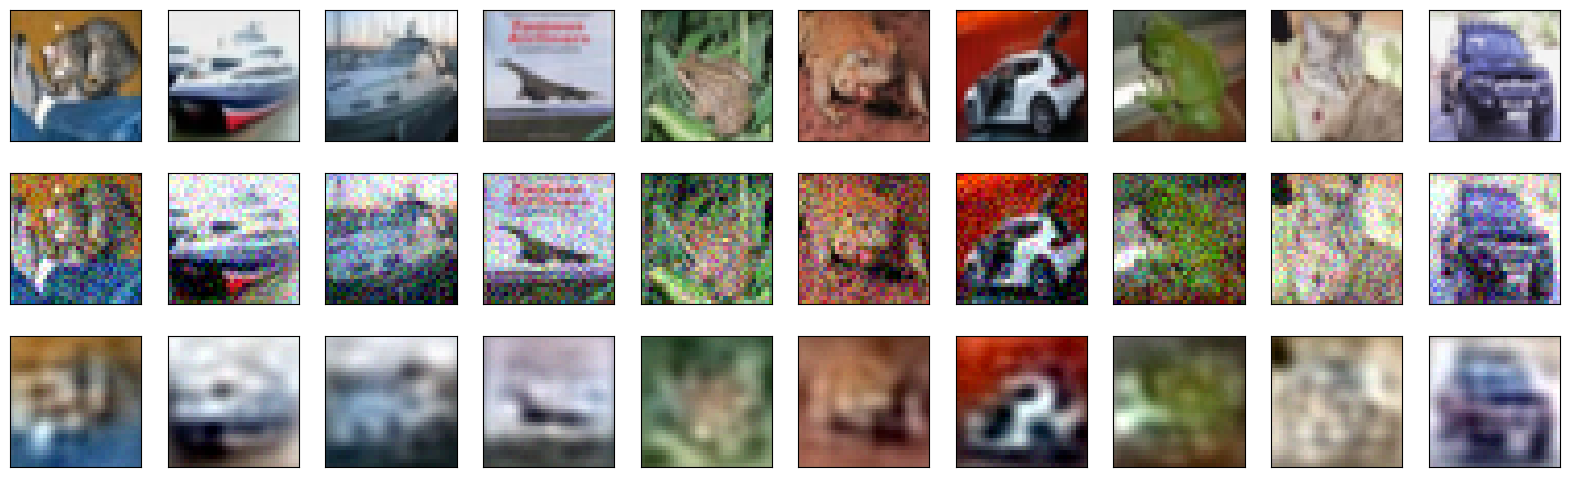

Compression Ratio for PCA: 30.72
313/313 [==============================] - 1s 2ms/step


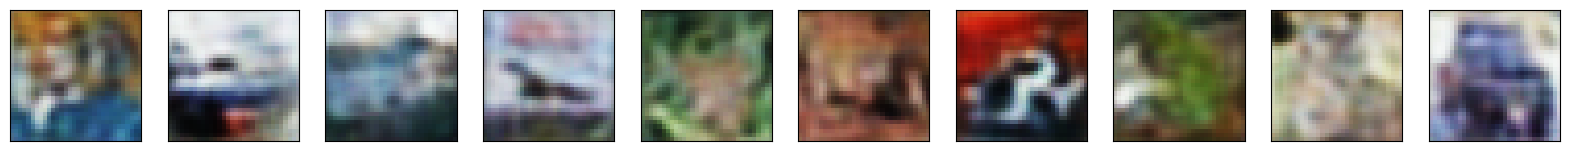

Compression Ratio for Autoencoder: 12.0


In [ ]:
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error

# Flatten images for PCA
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add Gaussian noise to the images
mu, sigma = 0, 0.1  # Mean and standard deviation
noise = np.random.normal(mu, sigma, x_test_flat.shape)
x_test_noisy = x_test_flat + noise
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Implement PCA as an image denoiser
def apply_pca(images, n_components):
    pca = PCA(n_components=n_components)
    images_pca = pca.fit_transform(images)
    images_reconstructed = pca.inverse_transform(images_pca)
    return images_reconstructed

# Choose the number of components for PCA
n_components_pca = 100

# Apply PCA to the flattened images
x_test_pca_denoised = apply_pca(x_test_noisy, n_components_pca)
x_test_pca_denoised = x_test_pca_denoised.reshape(x_test.shape)

# Display images denoised by PCA
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images by PCA
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test_pca_denoised[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

compression_ratio_pca = np.prod(x_test.shape[1:]) / n_components_pca
print(f"Compression Ratio for PCA: {compression_ratio_pca}")


denoised_imgs_autoencoder = autoencoder.predict(x_test_noisy.reshape(10000,32, 32, 3))

plt.figure(figsize=(20, 6))
for i in range(n):
    # Display denoised images by autoencoder
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(denoised_imgs_autoencoder[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

compression_ratio_autoencoder = 3072 / 256
print(f"Compression Ratio for Autoencoder: {compression_ratio_autoencoder}")


Epoch 1/10
235/235 [==============================] - 4s 11ms/step - loss: 0.2818 - val_loss: 0.2172
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1968 - val_loss: 0.1805
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1734 - val_loss: 0.1641
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1581 - val_loss: 0.1513
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1489 - val_loss: 0.1443
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1420 - val_loss: 0.1378
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1370 - val_loss: 0.1342
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1339 - val_loss: 0.1316
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1318 - val_loss: 0.1294
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


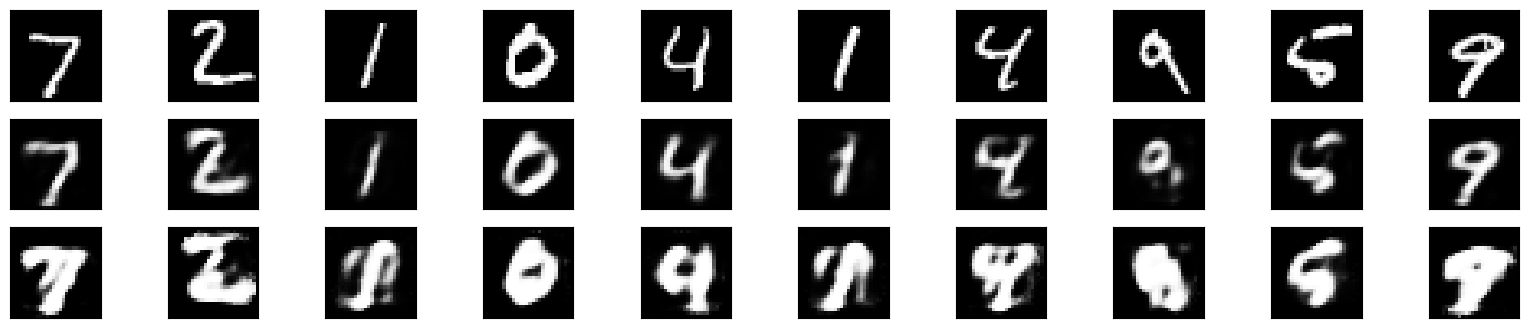

In [ ]:
import keras
from keras import layers
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Define constants
encoding_dim = 32
noise_factor = 0.5

# Load MNIST data
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Preprocess data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add Gaussian noise to original images
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Build Autoencoder
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)

# Compile Autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train Autoencoder on noisy images
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Generate denoised images from noisy test images (2.1)
denoised_imgs_1 = autoencoder.predict(x_test_noisy)

# Generate noisy codes and denoised images from noisy codes (2.2)
encoded_imgs = autoencoder.predict(x_test)
encoded_imgs_noisy = encoded_imgs + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=encoded_imgs.shape)
denoised_imgs_2 = autoencoder.predict(encoded_imgs_noisy)

# Visualize the difference between 2.1 and 2.2
n = 10  # How many digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display 2.1 (Noisy Images -> Denoised Images)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs_1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display 2.2 (Noisy Code -> Denoised Images)
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_imgs_2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
